In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import random
%matplotlib inline

def r_func(k, theta):
    return k * theta

def z_func(r, theta):
    return (r * np.cos(theta)) ** 2 + (r * np.sin(theta)) ** 3

def z_func_xy(x, y):
    return x ** 2 + y ** 3

def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return (x, y)

def inPolygon(x, y, xp, yp):
    c=0
    for i in range(len(xp)):
        if (((yp[i]<=y and y<yp[i-1]) or (yp[i-1]<=y and y<yp[i])) and \
            (x > (xp[i-1] - xp[i]) * (y - yp[i]) / (yp[i-1] - yp[i]) + xp[i])): c = 1 - c    
    return c

In [2]:
start = 0
end = 6 * np.pi
theta = np.arange(start, end, 0.01)

k1 = 1/2
k2 = 1/3

r1 = r_func(k1, theta)
r2 = r_func(k2, theta)

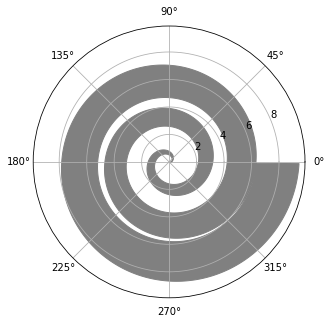

In [3]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection='polar')
ax.fill_between(theta, r1, r2, color='gray')
# ax.scatter(theta_rand, r_rand, marker='.', c='k')

ax.grid(True)
plt.show()

In [4]:
x1, y1 = pol2cart(r1, theta)
x2, y2 = pol2cart(r2, theta)

xx = np.append(x1, x2)
yy = np.append(y1, y2)

xmax = np.max(xx)
ymax = np.max(yy)
xmin = np.min(xx)
ymin = np.min(yy)

S = 159.4703135907109


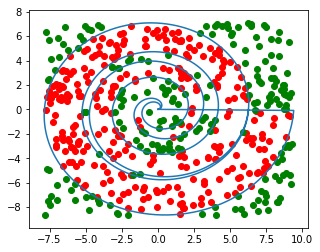

In [5]:
N = 500
x_rand = random.uniform(xmin, xmax, N)
y_rand = random.uniform(ymin, ymax, N)

inside_mask = np.zeros(N)

for i in range(N):
    inside_mask[i] = inPolygon(x_rand[i], y_rand[i], xx, yy)

x_in, y_in = x_rand[inside_mask == 1], y_rand[inside_mask == 1]
x_out, y_out = x_rand[inside_mask == 0], y_rand[inside_mask == 0]
K = len(x_in)

S1 = (np.abs(xmin) + xmax) * (np.abs(ymin) + ymax) * K / N
print(f'S = {S1}')

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(xx, yy)
ax.scatter(x_in, y_in, c='r')
ax.scatter(x_out, y_out, c='g')

plt.show()

S=17246.708188781464


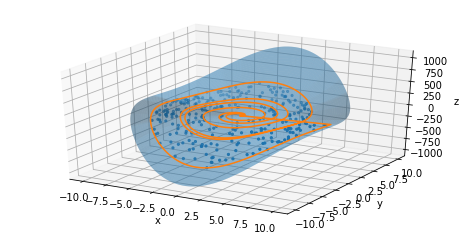

In [6]:
zz = z_func_xy(xx, yy)
z_in = z_func_xy(x_in, y_in)

S2 = S1 / len(z_in) * np.sum(np.abs(z_in))
print(f'S={S2}')

r = np.arange(0, 10, 0.01)
R, T = np.meshgrid(r, theta)
Z = z_func(R, T)
X, Y = R*np.cos(T), R*np.sin(T)

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(projection='3d'))
ax.plot_surface(X, Y, Z, alpha=0.2)
ax.plot(xx, yy, zz)

colors = cm.rainbow(z_in/len(z_in)*10+0.5)
ax.scatter(x_in, y_in, z_in, marker='.')
ax.set_zlabel('z')
ax.set_xlabel('x')
ax.set_ylabel('y')


plt.show()